In [1]:
%run "Dataframes.ipynb"

Deaths  has  263862  entries
Vaccination  has  210103  entries
Demographics  has  643  entries
Age  has  617  entries
Hospitals  has  552  entries
The keys of the dataframes are: 

Deaths :
length:  263862
Index(['pc11_state_id', 'pc11_district_id', 'date', 'total_cases',
       'total_deaths'],
      dtype='object')
Vaccination :
length:  210103
Index(['lgd_state_id', 'lgd_state_name', 'lgd_district_id',
       'lgd_district_name', 'date', 'total_individuals_registered',
       'total_sessions_conducted', 'total_sites', 'total_covaxin',
       'total_covishield', 'first_dose_admin', 'second_dose_admin', 'male_vac',
       'female_vac', 'trans_vac', 'state', 'district', 'bad_flg_covishield',
       'bad_flg_covaxin'],
      dtype='object')
Demographics :
length:  643
Index(['pc11_state_id', 'pc11_district_id', 'pc11_urb_share', 'pc11_slum_pop',
       'pc11_vd_area', 'pc11_td_area', 'pc11_tot_area', 'pc11_pop_dens',
       'pc11r_pca_tot_p', 'pc11u_pca_tot_p', 'pc11_pca_tot_p',
       

In [2]:
#drops the date and state id columns
ddrop = deaths_frame.drop(['date','pc11_state_id'],axis=1)

#groups by district and sums deaths and cases over the entire period
deaths_total = ddrop.groupby(['censuscode']).sum()

deaths_total.reset_index(inplace = True)

deaths_total.head()

,censuscode,total_cases,total_deaths
0,1,1202840.0,20388.0
1,2,1614414.0,25240.0
2,3,1401315.0,14638.0
3,4,508224.0,9312.0
4,5,517956.0,4809.0


In [3]:
keys_frame = names_frame

In [10]:
ddrop_keys = keys_frame.drop(['pc11_state_id','pc11_state_name'],axis=1)

#drops duplicates
dkeys = ddrop_keys.drop_duplicates(subset=['pc11_district_name']).rename({'pc11_district_id': 'censuscode', 'pc11_district_name': 'district'}, axis=1)

#converts censuscode float to int
dkeys = dkeys.fillna(0).astype({'censuscode': 'int64'})

#sets censuscode as index
#dkeys = dkeys.set_index('censuscode')

dkeys_dict = dkeys.to_dict()

In [13]:
dkeys

,censuscode,district
0,1,kupwara
370,2,badgam
845,3,leh ladakh
958,4,kargil
1085,5,punch
...,...,...
632668,634,yanam
632672,636,mahe
632674,638,nicobars
632870,639,north middle andaman


<AxesSubplot:xlabel='total_deaths', ylabel='Density'>

<AxesSubplot:xlabel='total_cases', ylabel='Density'>

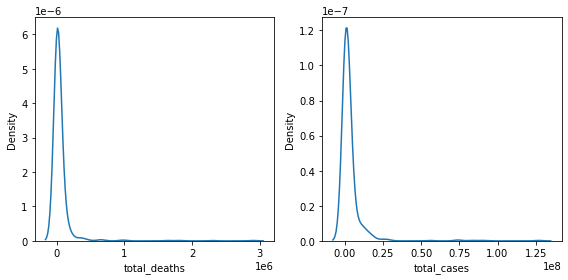

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.kdeplot(deaths_total['total_deaths'], ax=axs[0])
sns.kdeplot(deaths_total['total_cases'], ax=axs[1])
f.tight_layout()



#ax = sns.joinplot(x="censuscode", y="total_cases", data=dtot,)

In [6]:
dkeys_dict[94]  = 'delhi'
dkeys_dict[519] = 'mumbai'

In [7]:
#sorts by 10 most affected districts
dh_cases = deaths_total.sort_values(by=['total_cases'],ascending = False).head(10)
dh_deaths = deaths_total.sort_values(by=['total_deaths'],ascending = False).head(10)

#merges databases
df_merge = pd.merge(dh_deaths, dh_cases, how='outer').set_index('censuscode')

df_dc = df_merge.join(dkeys)

df_dc


,total_cases,total_deaths,district
censuscode,,,
519,7.466528e+07,2.887546e+06,NaN
94,1.270969e+08,2.288456e+06,NaN
521,8.983572e+07,1.791807e+06,pune
517,7.371049e+07,1.626255e+06,thane
603,5.529837e+07,9.954970e+05,chennai
572,8.309565e+07,9.585020e+05,NaN
505,2.922403e+07,6.800170e+05,nagpur
342,2.492851e+07,6.465220e+05,kolkata
474,1.440694e+07,6.273486e+05,NaN


In [8]:
deaths_total = deaths_total.merge(demog_frame[['censuscode','pc11_pca_tot_p']])
deaths_total = deaths_total.rename({'pc11_pca_tot_p':'population'}, axis=1)
deaths_total

,censuscode,total_cases,total_deaths,population
0,1,1202840.0,20388.0,870354.0
1,2,1614414.0,25240.0,753745.0
2,3,1401315.0,14638.0,133487.0
3,4,508224.0,9312.0,140802.0
4,5,517956.0,4809.0,476835.0
...,...,...,...,...
605,635,6719313.0,115193.0,950289.0
606,636,332122.0,1586.0,41816.0
607,637,803987.0,13175.0,200222.0
608,639,31.0,0.0,105597.0
